In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing/anscombe.csv
/kaggle/input/housing/housing.csv


In [2]:
df=pd.read_csv("/kaggle/input/housing/housing.csv")

In [3]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [4]:
df = df.select_dtypes(include = ['float64', 'int64']) 

In [5]:
df.head().T

,0,1,2,3,4
longitude,-122.2300,-122.2200,-122.2400,-122.2500,-122.2500
latitude,37.8800,37.8600,37.8500,37.8500,37.8500
housing_median_age,41.0000,21.0000,52.0000,52.0000,52.0000
total_rooms,880.0000,7099.0000,1467.0000,1274.0000,1627.0000
total_bedrooms,129.0000,1106.0000,190.0000,235.0000,280.0000
population,322.0000,2401.0000,496.0000,558.0000,565.0000
households,126.0000,1138.0000,177.0000,219.0000,259.0000
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0000,358500.0000,352100.0000,341300.0000,342200.0000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Veri Görselleştirme

In [7]:
import seaborn as sns
import missingno as msno

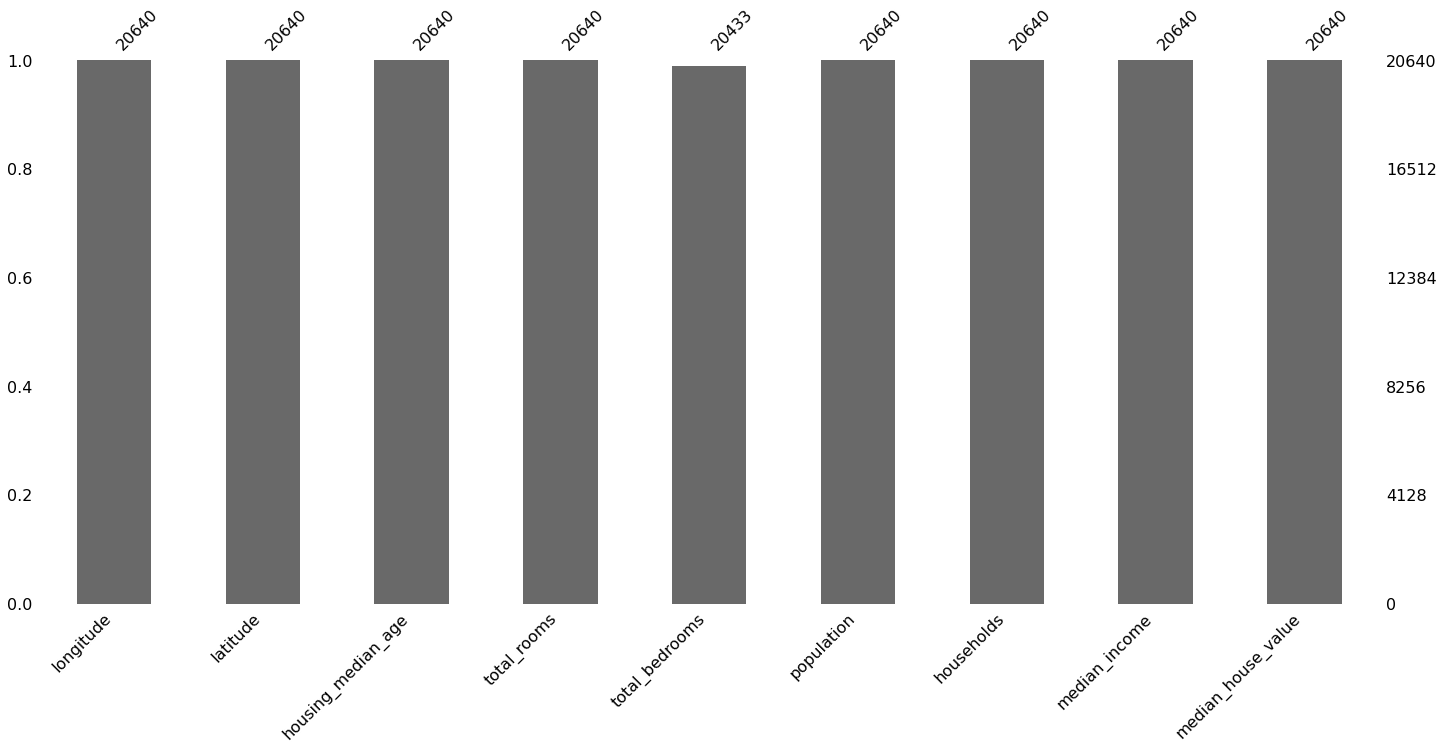

In [8]:
msno.bar(df); # Verileri görselleştirdiğiğmizde eksik verilerin totaL_bedrooms kolonunda olduğu anlaşılmaktadır

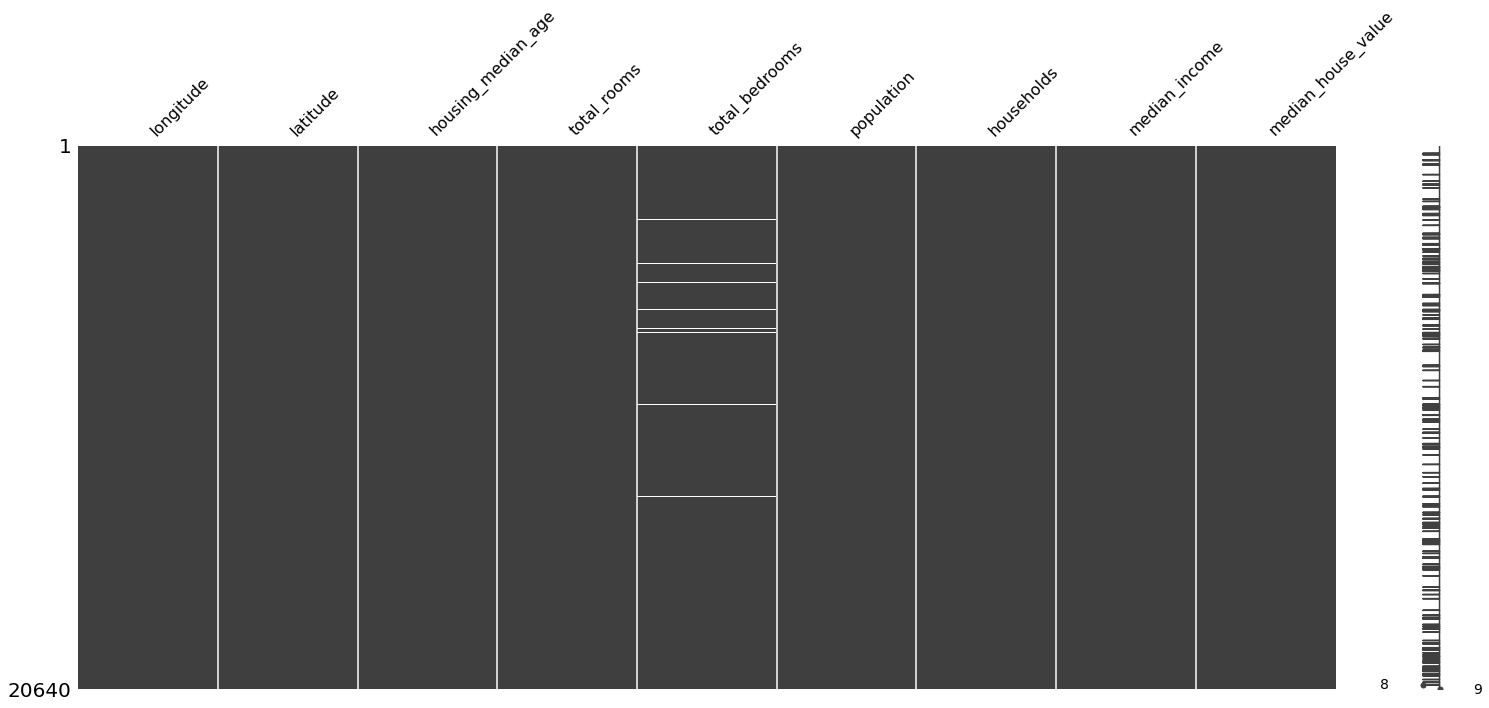

In [9]:
msno.matrix(df); # Eksik veriler burada daha net gözükmektedir

## Verileri Silme veya Ortalama Değer Atama

In [10]:
df.dropna().isnull().sum() # dropna dediğimiz 207 adet veri silinir.

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [11]:
# Ortalama Değer Atama
df2=df.fillna(df.mean()[:])
df2.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

## Tahmine Dayalı değer atama

In [12]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [13]:
!pip install ycimpute

In [14]:
from ycimpute.imputer import knnimput

In [15]:
var_names = list(df)

In [16]:
n_df = np.array(df)

In [17]:
n_df[0:10]

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01,  8.8000e+02,  1.2900e+02,
         3.2200e+02,  1.2600e+02,  8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01,  7.0990e+03,  1.1060e+03,
         2.4010e+03,  1.1380e+03,  8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01,  1.4670e+03,  1.9000e+02,
         4.9600e+02,  1.7700e+02,  7.2574e+00,  3.5210e+05],
       [-1.2225e+02,  3.7850e+01,  5.2000e+01,  1.2740e+03,  2.3500e+02,
         5.5800e+02,  2.1900e+02,  5.6431e+00,  3.4130e+05],
       [-1.2225e+02,  3.7850e+01,  5.2000e+01,  1.6270e+03,  2.8000e+02,
         5.6500e+02,  2.5900e+02,  3.8462e+00,  3.4220e+05],
       [-1.2225e+02,  3.7850e+01,  5.2000e+01,  9.1900e+02,  2.1300e+02,
         4.1300e+02,  1.9300e+02,  4.0368e+00,  2.6970e+05],
       [-1.2225e+02,  3.7840e+01,  5.2000e+01,  2.5350e+03,  4.8900e+02,
         1.0940e+03,  5.1400e+02,  3.6591e+00,  2.9920e+05],
       [-1.2225e+02,  3.7840e+01,  5.2000e+01,  3.1040e+03,  6

In [18]:
n_df.shape

(20640, 9)

In [19]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/20640 with 0 missing, elapsed time: 74.668
Imputing row 101/20640 with 0 missing, elapsed time: 74.669
Imputing row 201/20640 with 0 missing, elapsed time: 74.669
Imputing row 301/20640 with 0 missing, elapsed time: 74.671
Imputing row 401/20640 with 0 missing, elapsed time: 74.672
Imputing row 501/20640 with 0 missing, elapsed time: 74.672
Imputing row 601/20640 with 0 missing, elapsed time: 74.673
Imputing row 701/20640 with 0 missing, elapsed time: 74.674
Imputing row 801/20640 with 0 missing, elapsed time: 74.675
Imputing row 901/20640 with 0 missing, elapsed time: 74.675
Imputing row 1001/20640 with 0 missing, elapsed time: 74.676
Imputing row 1101/20640 with 0 missing, elapsed time: 74.677
Imputing row 1201/20640 with 0 missing, elapsed time: 74.677
Imputing row 1301/20640 with 0 missing, elapsed time: 74.678
Imputing row 1401/20640 with 0 missing, elapsed time: 74.679
Imputing row 1501/20640 with 0 missing, elapsed time: 74.680
Imputing row 1601/20640 with 0 missi

In [20]:
dff = pd.DataFrame(dff, columns = var_names)
dff.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [21]:
dff.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64